### Student Information
Name: 林宜靜

Student ID: 112034546

GitHub ID: SereneL

---

### Instructions

1. First: do the **take home** exercises in the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. You need to combine three labeled datasets into one file for your data preparation part.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fjrialdnc0615/DM2023-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Thursday)__. 

In [14]:
### Begin Assignment Here

In [15]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [16]:
import math
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
from sklearn.preprocessing import binarize
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D

import helpers.data_mining_helpers as dmh

import nltk
from wordcloud import WordCloud

## Part 1

In [17]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [19]:
# obtain the documents containing the categories provided
twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)

In [20]:
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
# add category to the dataframe
X['category'] = twenty_train.target
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

### Exercise 2

In [21]:
# Experiment with other querying techniques using pandas dataframes
X[['text']]
X.iloc[:, 0]
X.loc[:, 'text']

X.iat[0, 0]
X.at[0,'text']

X.iloc[:, X.columns.get_loc('text')]

X[X['category_name'] == 'sci.med']

text  category  \
7     From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8     From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   
9     From: libman@hsc.usc.edu (Marlena Libman) Subj...         2   
16    From: texx@ossi.com (Robert "Texx" Woodworth) ...         2   
28    From: rind@enterprise.bih.harvard.edu (David R...         2   
...                                                 ...       ...   
2252  From: roos@Operoni.Helsinki.FI (Christophe Roo...         2   
2253  From: mhollowa@ic.sunysb.edu (Michael Holloway...         2   
2254  From: sasghm@theseus.unx.sas.com (Gary Merrill...         2   
2255  From: Dan Wallach <dwallach@cs.berkeley.edu> S...         2   
2256  From: dyer@spdcc.com (Steve Dyer) Subject: Re:...         2   

     category_name  
7          sci.med  
8          sci.med  
9          sci.med  
16         sci.med  
28         sci.med  
...            ...  
2252       sci.med  
2253       sci.med  
2254       sci.med  
2255       sci.med  
2256       sci.med  

[594 rows x 3 columns]

### Exercise 5

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [22]:
NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F

In [23]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [24]:
# Answer here
# The reason is that in the third, forth and the last data, type of the values are string.

--------------------------

In [25]:
X.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe

In [26]:
print(X.shape)
X_sample = X.sample(n=1000, random_state=42) #random state
display(X_sample)

(2257, 3)


text  category  \
561   From: ray@engr.LaTech.edu (Bill Ray) Subject: ...         2   
440   From: jkellett@netcom.com (Joe Kellett) Subjec...         3   
1513  From: noring@netcom.com (Jon Noring) Subject: ...         2   
1360  From: fraseraj@dcs.glasgow.ac.uk (Andrew J Fra...         3   
259   From: keith@cco.caltech.edu (Keith Allan Schne...         0   
...                                                 ...       ...   
1316  From: salaris@niblick.ecn.purdue.edu (Rrrrrrrr...         3   
592   From: sandvik@newton.apple.com (Kent Sandvik) ...         0   
1965  From: uad1126@tdc.dircon.co.uk (Robert Palmer)...         3   
363   From: mdpyssc@fs1.mcc.ac.uk (Sue Cunningham) S...         1   
1893  From: wcsbeau@alfred.carleton.ca (OPIRG) Subje...         2   

               category_name  
561                  sci.med  
440   soc.religion.christian  
1513                 sci.med  
1360  soc.religion.christian  
259              alt.atheism  
...                      ...  
1316  soc.religion.christian  
592              alt.atheism  
1965  soc.religion.christian  
363            comp.graphics  
1893                 sci.med  

[1000 rows x 3 columns]

### Exercise 6

In [27]:
# Answer here
# The order of indices in X_sample has changed
# The distribution of X_sample compares to X has slightly changed (from the plot below)

-------------

### Exercise 8

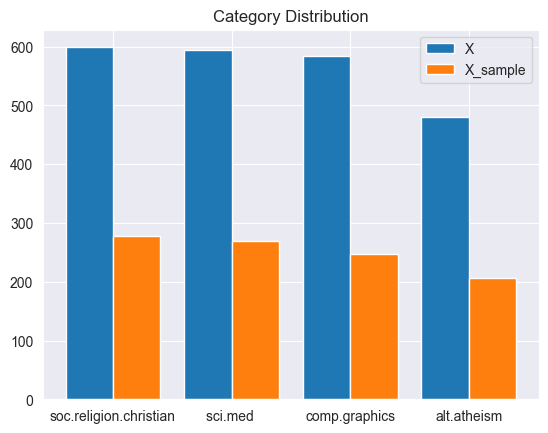

In [28]:
# Answer here

idx=np.arange(len(categories))
width = 0.4

plt.bar(idx, X.category_name.value_counts(), width=width, label='X')
plt.bar(idx + width, X_sample.category_name.value_counts(), width=width, label='X_sample')
plt.title('Category Distribution')
plt.xticks(idx + width /2, ('soc.religion.christian', 'sci.med ', 'comp.graphics','alt.atheism'))

plt.legend(loc='upper right')

plt.show()

------------

In [29]:
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
print(X_counts.shape)
print(X_counts[0])

(2257, 35788)
  (0, 14887)	1
  (0, 29022)	1
  (0, 8696)	4
  (0, 4017)	2
  (0, 33256)	2
  (0, 21661)	3
  (0, 9031)	3
  (0, 31077)	1
  (0, 9805)	2
  (0, 17366)	1
  (0, 32493)	4
  (0, 16916)	2
  (0, 19780)	2
  (0, 17302)	2
  (0, 23122)	1
  (0, 25663)	1
  (0, 16881)	1
  (0, 16082)	1
  (0, 23915)	1
  (0, 32142)	5
  (0, 33597)	2
  (0, 20253)	1
  (0, 587)	1
  (0, 12051)	1
  (0, 5201)	1
  :	:
  (0, 25361)	1
  (0, 25337)	1
  (0, 12833)	2
  (0, 5195)	1
  (0, 27836)	1
  (0, 18474)	1
  (0, 32270)	1
  (0, 9932)	1
  (0, 15837)	1
  (0, 32135)	1
  (0, 17556)	1
  (0, 4378)	1
  (0, 26175)	1
  (0, 9338)	1
  (0, 33572)	1
  (0, 31915)	1
  (0, 177)	2
  (0, 2326)	2
  (0, 3062)	1
  (0, 35416)	1
  (0, 20459)	1
  (0, 14085)	1
  (0, 3166)	1
  (0, 12541)	1
  (0, 230)	1


### Exercise 10

In [30]:
# Answer here
sum_matrix = X_counts[0:5, 0:100].sum(axis=0)
indices = np.where(sum_matrix != 0)      # array contains sum of the columns larger than 0 in X_counts[0:5, 0:100]

count_vect.get_feature_names_out()[indices[1]][1]

'01'

### Exercise 11

In [31]:
# Answer here
# plot terms whose term frequency larger than median+4*standard deviation
term_median = np.median(np.asarray(X_counts.sum(axis=0)))
term_std = np.std(np.asarray(X_counts.sum(axis=0)))

term_idx_list = []
plot_x = []
for idx, i in enumerate(np.asarray(X_counts.sum(axis=0))[0]):
    if i > term_median + 4*term_std:
        term_idx_list.append(idx)
        plot_x.append(f'term_{count_vect.get_feature_names_out()[idx]}')

In [32]:
plot_z = []
for i in range(20):
    freq = []
    for idx in term_idx_list:
        freq.append(X_counts[i, idx])
    plot_z.append(freq)
    
plot_y = [f'doc_{i}' for i in range(0, 20)]
plot_z = X_counts[:20, term_idx_list].toarray()
print(plot_z.shape)

(20, 73)


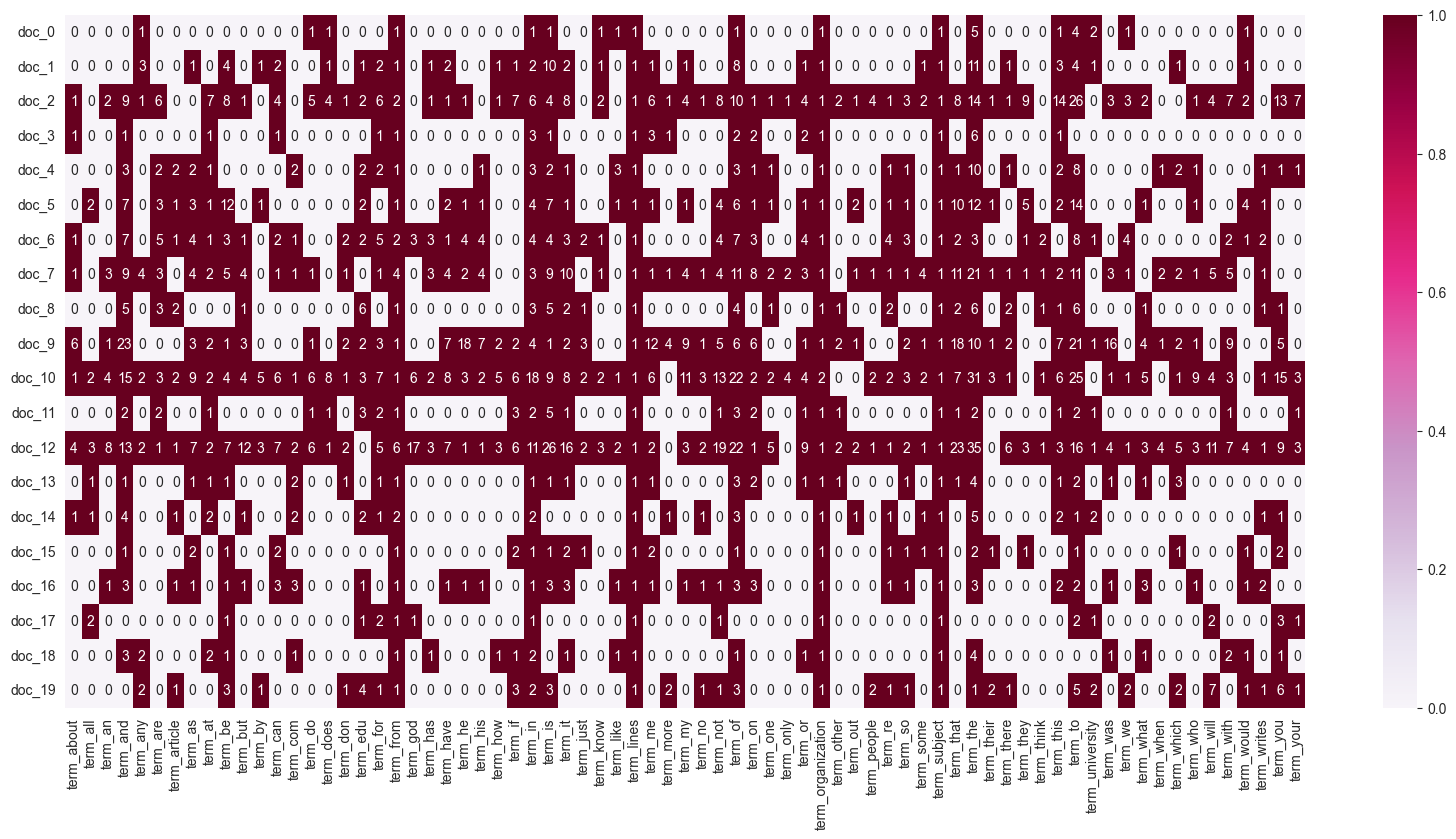

In [33]:
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
# display(df_todraw)
plt.subplots(figsize=(20, 9))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

--------

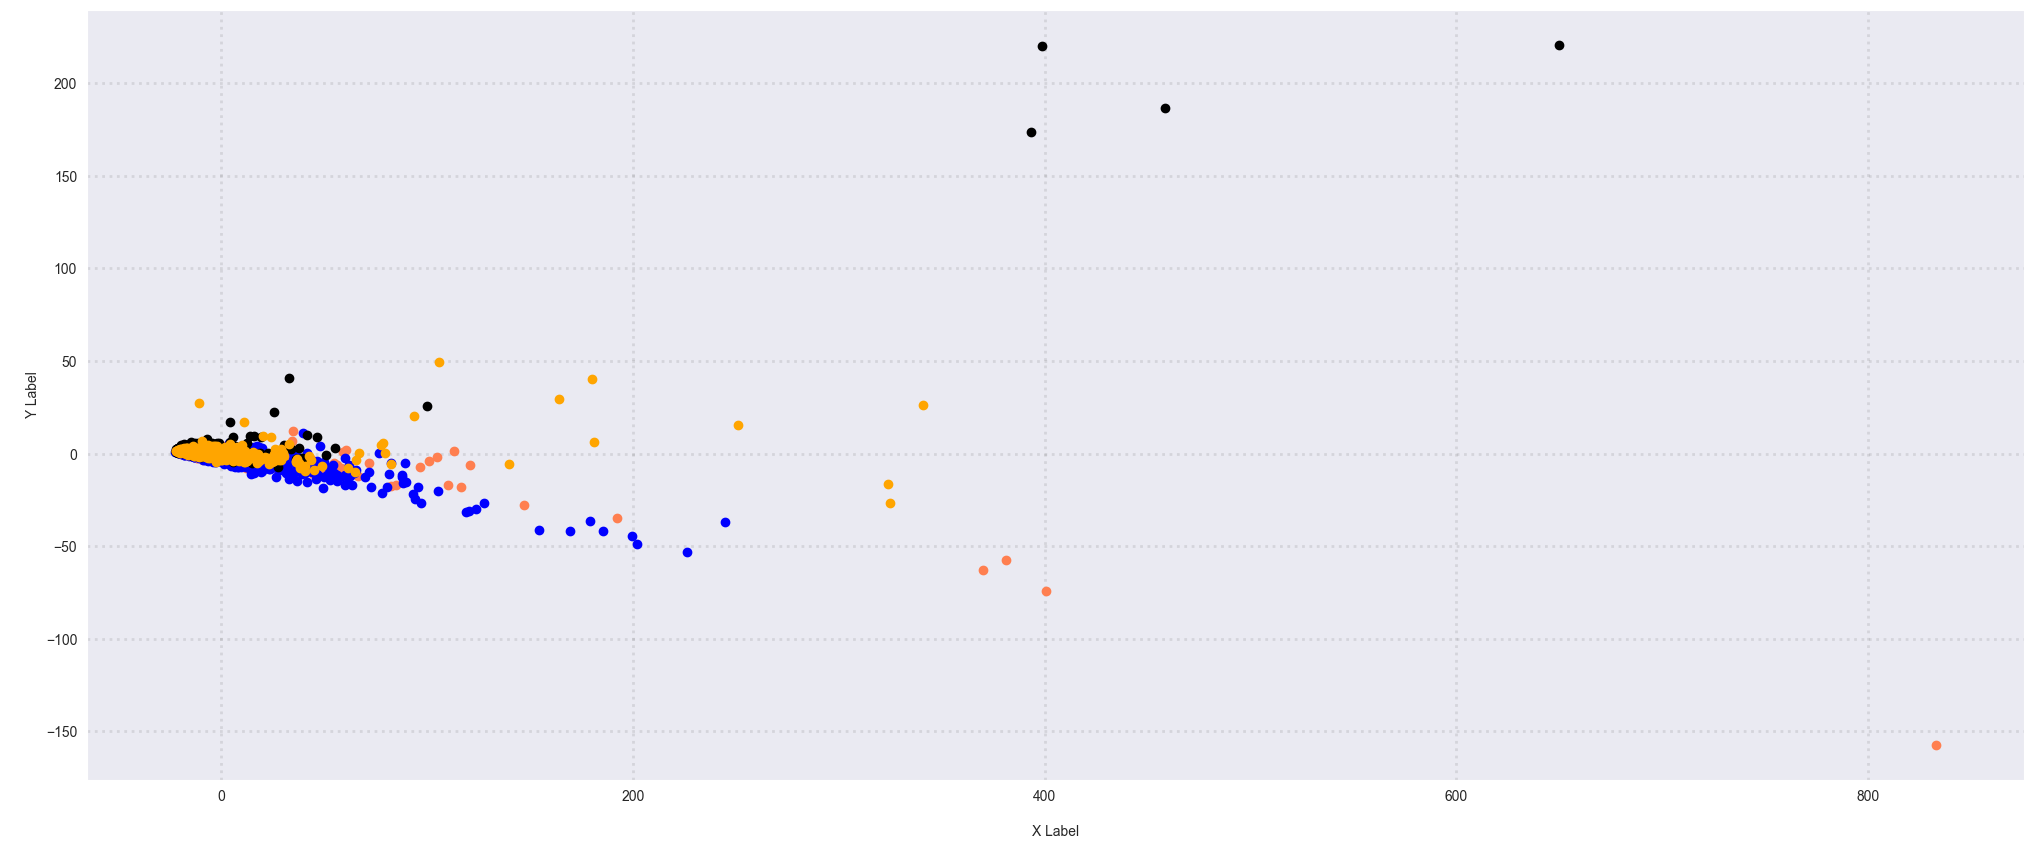

In [34]:
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())

col = ['coral', 'blue', 'black', 'orange']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

### Exercise 12

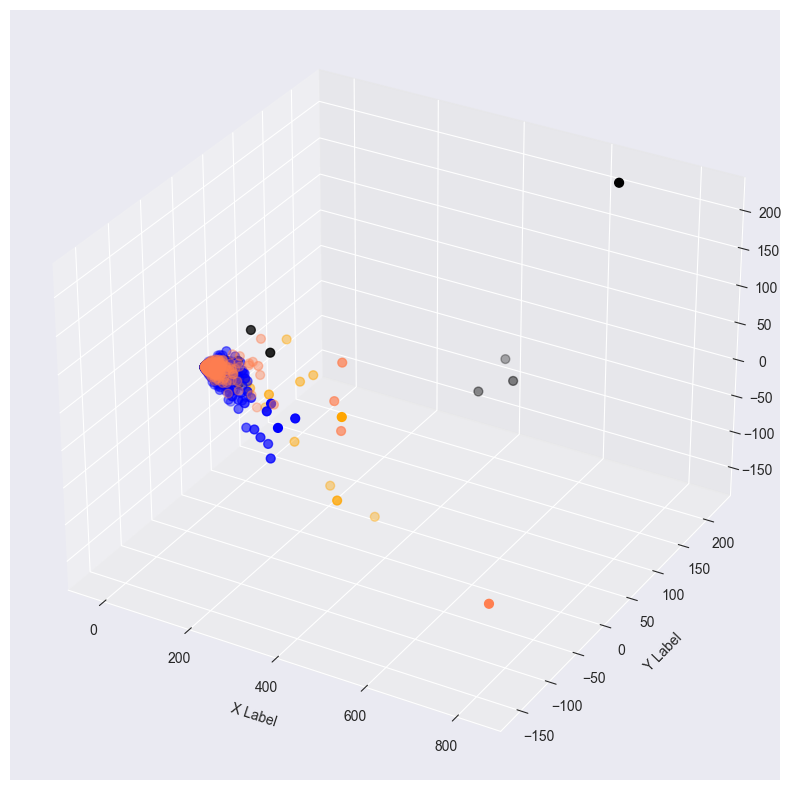

In [35]:
# Answer here
X_reduced_3D = PCA(n_components = 3).fit_transform(X_counts.toarray())
X_reduced_3D

col = ['coral', 'blue', 'black', 'orange']

# plot
fig = plt.figure(1, figsize=(25, 10))    # figsize = (25,10)
ax = fig.add_subplot(projection='3d')
# ax = Axes3D(fig, elev=-150, azim=90)

for c, category in zip(col, categories):
    xs = X_reduced_3D[X['category_name'] == category].T[0]
    ys = X_reduced_3D[X['category_name'] == category].T[1]
    zs = X_reduced_3D[X['category_name'] == category].T[2]
   
    ax.scatter(xs, ys, zs, c = c, s=40)

# ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
ax.view_init()
plt.show()

----------

In [36]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
print(X_counts.shape[1])
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

35788


C:\Users\908\AppData\Local\Temp\ipykernel_17928\2124377475.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)


[Text(0, 0, '00'),
 Text(1, 0, '000'),
 Text(2, 0, '0000'),
 Text(3, 0, '0000001200'),
 Text(4, 0, '000005102000'),
 Text(5, 0, '0001'),
 Text(6, 0, '000100255pixel'),
 Text(7, 0, '00014'),
 Text(8, 0, '000406'),
 Text(9, 0, '0007'),
 Text(10, 0, '000usd'),
 Text(11, 0, '0010'),
 Text(12, 0, '001004'),
 Text(13, 0, '0010580b'),
 Text(14, 0, '001125'),
 Text(15, 0, '001200201pixel'),
 Text(16, 0, '0014'),
 Text(17, 0, '001642'),
 Text(18, 0, '00196'),
 Text(19, 0, '002'),
 Text(20, 0, '0028'),
 Text(21, 0, '003258u19250'),
 Text(22, 0, '0033'),
 Text(23, 0, '0038'),
 Text(24, 0, '0039'),
 Text(25, 0, '004021809'),
 Text(26, 0, '004158'),
 Text(27, 0, '004627'),
 Text(28, 0, '0049'),
 Text(29, 0, '00500'),
 Text(30, 0, '005148'),
 Text(31, 0, '00630'),
 Text(32, 0, '008561'),
 Text(33, 0, '0094'),
 Text(34, 0, '00am'),
 Text(35, 0, '00index'),
 Text(36, 0, '00pm'),
 Text(37, 0, '01'),
 Text(38, 0, '0100'),
 Text(39, 0, '010116'),
 Text(40, 0, '010702'),
 Text(41, 0, '011255'),
 Text(42, 

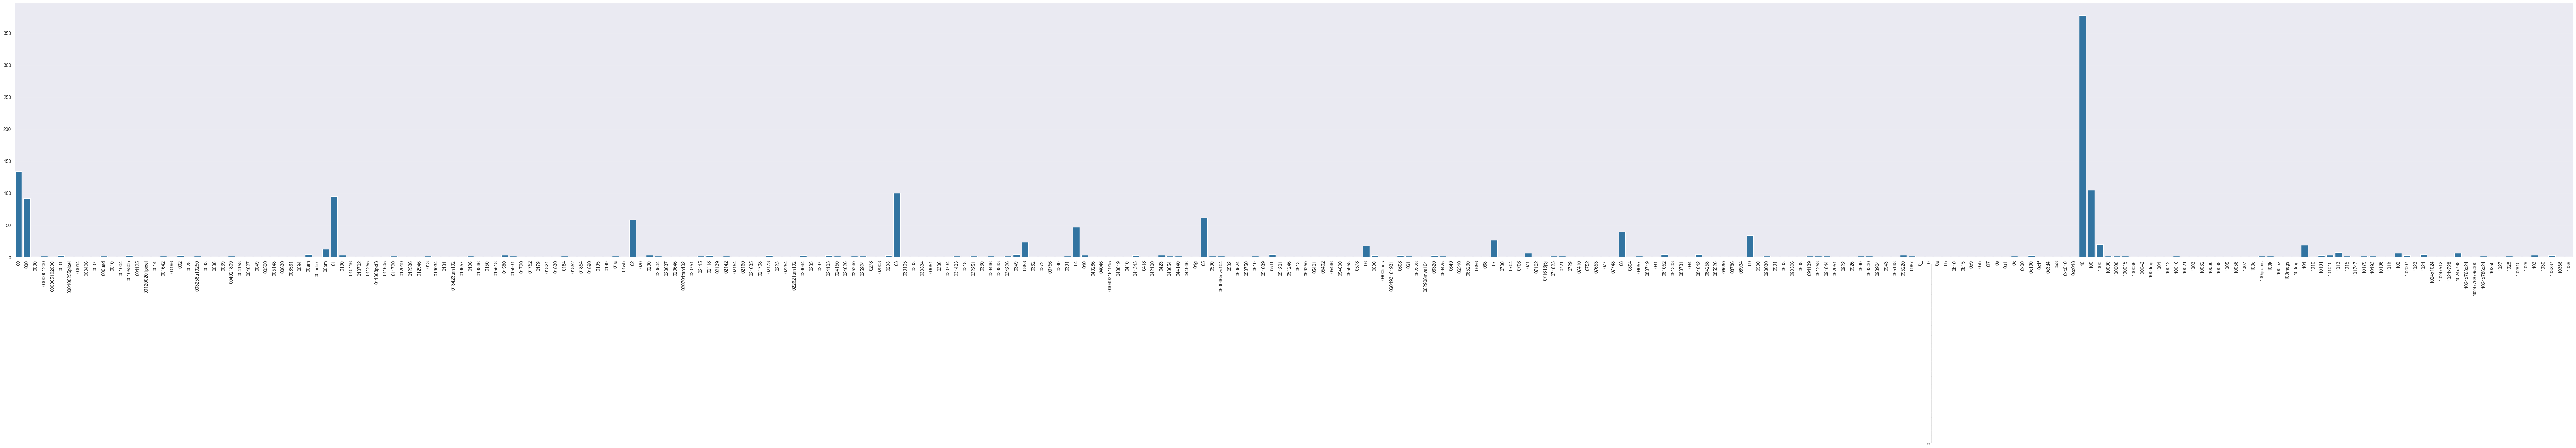

In [37]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)

### Exercise 13

In [38]:
# Answer here
df = pd.DataFrame()
df['term_frequencies'] = term_frequencies[:300]
df['term'] = count_vect.get_feature_names_out()[:300]
fig = px.bar(df, x='term', y='term_frequencies')
fig.show()

### Exercise 14

In [39]:
# Answer here
df_14 = df[df['term_frequencies'] > 5]
fig = px.bar(df_14, x='term', y='term_frequencies')
fig.show()

### Exercise 15

In [40]:
# Answer here
df_15 = df.sort_values(by=['term_frequencies'], ascending=False)
fig = px.bar(df_15, x='term', y='term_frequencies')
fig.show()

------

In [41]:
mlb = preprocessing.LabelBinarizer()

mlb.fit(X.category)
X['bin_category'] = mlb.transform(X['category']).tolist()

### Exercise 16

In [42]:
# Answer here
mlb.fit(X.category_name)
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
X[0:9]

# it works.

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   

            category_name  bin_category bin_category_name  
0           comp.graphics  [0, 1, 0, 0]      [0, 1, 0, 0]  
1           comp.graphics  [0, 1, 0, 0]      [0, 1, 0, 0]  
2  soc.religion.christian  [0, 0, 0, 1]      [0, 0, 0, 1]  
3  soc.religion.christian  [0, 0, 0, 1]      [0, 0, 0, 1]  
4  soc.religion.christian  [0, 0, 0, 1]      [0, 0, 0, 1]  
5  soc.religion.christian  [0, 0, 0, 1]      [0, 0, 0, 1]  
6  soc.religion.christian  [0, 0, 0, 1]      [0, 0, 0, 1]  
7                 sci.med  [0, 0, 1, 0]      [0, 0, 1, 0]  
8                 sci.med  [0, 0, 1, 0]      [0, 0, 1, 0]

## Part 2

### Data Preparation

In [43]:
file_path_1 = r'sentiment+labelled+sentences/sentiment labelled sentences/amazon_cells_labelled.txt'
file_path_2 = r'sentiment+labelled+sentences/sentiment labelled sentences/imdb_labelled.txt'
file_path_3 = r'sentiment+labelled+sentences/sentiment labelled sentences/yelp_labelled.txt'

In [44]:
def format_rows(docs):
    """ format the text field and strip special characters """
    docs = docs.split('\n')
    D = []
    for d in docs:
        temp_d = d.split('\t')
        temp_d[0] = temp_d[0].strip()
        if len(temp_d[0]) != 0:
            D.append(temp_d)
    return D


def read_file(path):
    with open(path, 'r', encoding="utf-8") as file:
        # Read the entire file content into a string
        file_contents = file.read()
        file_contents.strip()
        return file_contents

In [45]:
r1 = format_rows(read_file(file_path_1))
r2 = format_rows(read_file(file_path_2))
r3 = format_rows(read_file(file_path_3))

### Data Transformation

In [46]:
cols = ['sentence', 'score']
content = np.vstack((r1, r2, r3))
X = pd.DataFrame(content, columns=cols)
X

sentence score
0     So there is no way for me to plug it in here i...     0
1                           Good case, Excellent value.     1
2                                Great for the jawbone.     1
3     Tied to charger for conversations lasting more...     0
4                                     The mic is great.     1
...                                                 ...   ...
2995  I think food should have flavor and texture an...     0
2996                           Appetite instantly gone.     0
2997  Overall I was not impressed and would not go b...     0
2998  The whole experience was underwhelming, and I ...     0
2999  Then, as if I hadn't wasted enough of my life ...     0

[3000 rows x 2 columns]

In [47]:
len(X)

3000

In [48]:
X['score'].unique()

array(['0', '1'], dtype=object)

### Data Mining using Pandas

#### Missing Values

In [49]:
# check missing values
X.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence                               score
0  The amoung of missing records is:   The amoung of missing records is: 
1                                   0                                   0

#### Dealing with Duplicate Data

In [50]:
sum(X.duplicated())

18

In [51]:
X[X.duplicated()==True]

sentence score
285                                       Great phone!.     1
407                                        Works great.     1
524                                       Works great!.     1
543                             Don't buy this product.     0
744   If you like a loud buzzing to override all you...     0
748                                       Does not fit.     0
778                               This is a great deal.     1
792                                        Great Phone.     1
892                    Excellent product for the price.     1
896                                        Great phone.     1
1105                                Very disappointing.     0
1363                     Definitely worth checking out.     1
1585                                   Not recommended.     0
1788                                              10/10     1
2814                                 I love this place.     1
2816                             The food was terrible.     0
2843                                   I won't be back.     0
2846                  I would not recommend this place.     0

In [52]:
X.drop_duplicates(inplace=True) # inplace applies changes directly on our dataframe
X

sentence score
0     So there is no way for me to plug it in here i...     0
1                           Good case, Excellent value.     1
2                                Great for the jawbone.     1
3     Tied to charger for conversations lasting more...     0
4                                     The mic is great.     1
...                                                 ...   ...
2995  I think food should have flavor and texture an...     0
2996                           Appetite instantly gone.     0
2997  Overall I was not impressed and would not go b...     0
2998  The whole experience was underwhelming, and I ...     0
2999  Then, as if I hadn't wasted enough of my life ...     0

[2982 rows x 2 columns]

### Data Preprocessing

#### Sampling

In [53]:
display(X)

sentence score
0     So there is no way for me to plug it in here i...     0
1                           Good case, Excellent value.     1
2                                Great for the jawbone.     1
3     Tied to charger for conversations lasting more...     0
4                                     The mic is great.     1
...                                                 ...   ...
2995  I think food should have flavor and texture an...     0
2996                           Appetite instantly gone.     0
2997  Overall I was not impressed and would not go b...     0
2998  The whole experience was underwhelming, and I ...     0
2999  Then, as if I hadn't wasted enough of my life ...     0

[2982 rows x 2 columns]

In [54]:
print(X.shape)
X_sample = X.sample(n=1000, random_state=42) #random state
display(X_sample)

(2982, 2)


sentence score
2423  We've tried to like this place but after 10+ t...     0
1559  The best example of how dumb the writing is wh...     0
889   It was that loud.Glad to say that the Plantron...     1
332                         The reception is excellent!     1
2239  Everyone is very attentive, providing excellen...     1
...                                                 ...   ...
926   It looses connection to the phone even when it...     0
1222                Mishima is extremely uninteresting.     0
2728           The Han Nan Chicken was also very tasty.     1
2470                                 Very good, though!     1
2904                         -My order was not correct.     0

[1000 rows x 2 columns]

<Axes: title={'center': 'Score distribution'}, xlabel='score'>

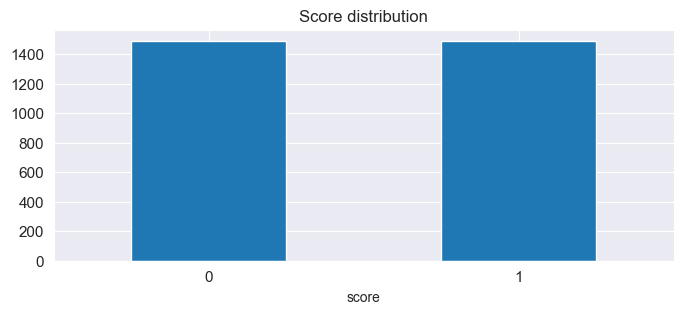

In [55]:
X.score.value_counts().plot(kind = 'bar',
                            title = 'Score distribution',
                            rot = 0, fontsize = 11, figsize = (8, 3))

<Axes: title={'center': 'Score distribution'}, xlabel='score'>

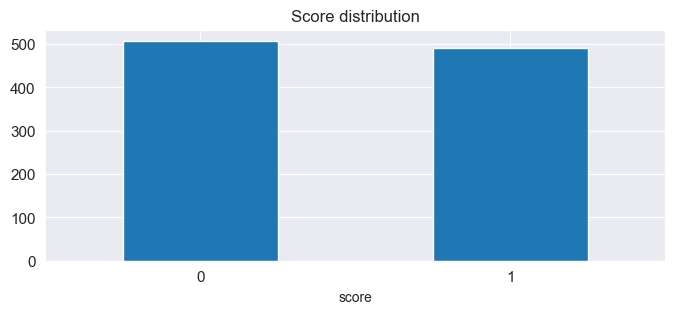

In [56]:
X_sample.score.value_counts().plot(kind = 'bar',
                            title = 'Score distribution',
                            rot = 0, fontsize = 11, figsize = (8, 3))

#### Feature Creation

In [57]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\908\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [58]:
X['unigrams'] = X['sentence'].apply(lambda x: dmh.tokenize_text(x))
# X[0:4]['unigrams']

In [59]:
X[0:4]

sentence score  \
0  So there is no way for me to plug it in here i...     0   
1                        Good case, Excellent value.     1   
2                             Great for the jawbone.     1   
3  Tied to charger for conversations lasting more...     0   

                                            unigrams  
0  [So, there, is, no, way, for, me, to, plug, it...  
1               [Good, case, ,, Excellent, value, .]  
2                      [Great, for, the, jawbone, .]  
3  [Tied, to, charger, for, conversations, lastin...

#### Feature Subset Selection

In [60]:
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.sentence) #learn the vocabulary and return document-term matrix
print(X_counts.shape)
# print(X_counts[0])

(2982, 5155)


In [61]:
count_vect.get_feature_names_out()[2900]

'missing'

In [62]:
# tokenization, remove stop words (e.g i, a, the), create n-gram (or unigram)
analyze = count_vect.build_analyzer()
analyze(X.sentence[0])

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

In [63]:
count_vect.get_feature_names_out()[0:10]

array(['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17'],
      dtype=object)

In [64]:
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [65]:
term_median = np.median(np.asarray(X_counts.sum(axis=0)))
term_std = np.std(np.asarray(X_counts.sum(axis=0)))

term_idx_list = []
plot_x = []
for idx, i in enumerate(np.asarray(X_counts.sum(axis=0))[0]):
    if i > term_median + 4*term_std:
        term_idx_list.append(idx)
        plot_x.append(f'term_{count_vect.get_feature_names_out()[idx]}')

In [66]:
plot_z = []
for i in range(20):
    freq = []
    for idx in term_idx_list:
        freq.append(X_counts[i, idx])
    plot_z.append(freq)
    
plot_y = [f'doc_{i}' for i in range(0, 20)]
plot_z = X_counts[:20, term_idx_list].toarray()
print(plot_z.shape)

(20, 24)


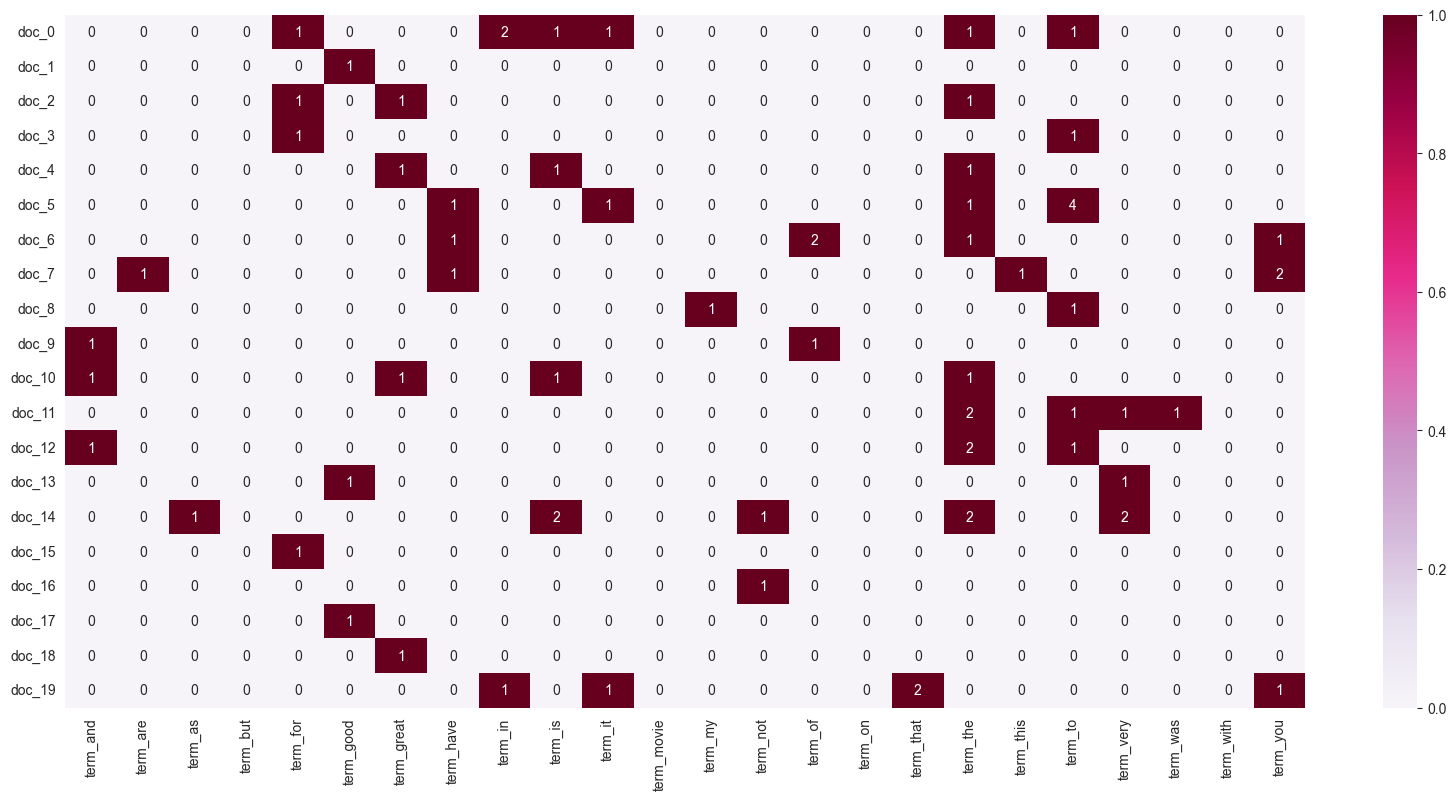

In [67]:
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
# display(df_todraw)
plt.subplots(figsize=(20, 9))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

#### Dimensionality Reduction

In [68]:
print(X_counts.shape)
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())
print(X_reduced.shape)
print(X_reduced)

(2982, 5155)
(2982, 2)
[[ 0.52348725  0.2867372 ]
 [-0.89859642 -0.36081989]
 [ 0.01517619 -0.66725952]
 ...
 [-0.50209007  0.41332375]
 [ 0.49781966  0.36760377]
 [ 2.33157376 -0.47569354]]


In [69]:
categories = X.score.unique()
categories

array(['0', '1'], dtype=object)

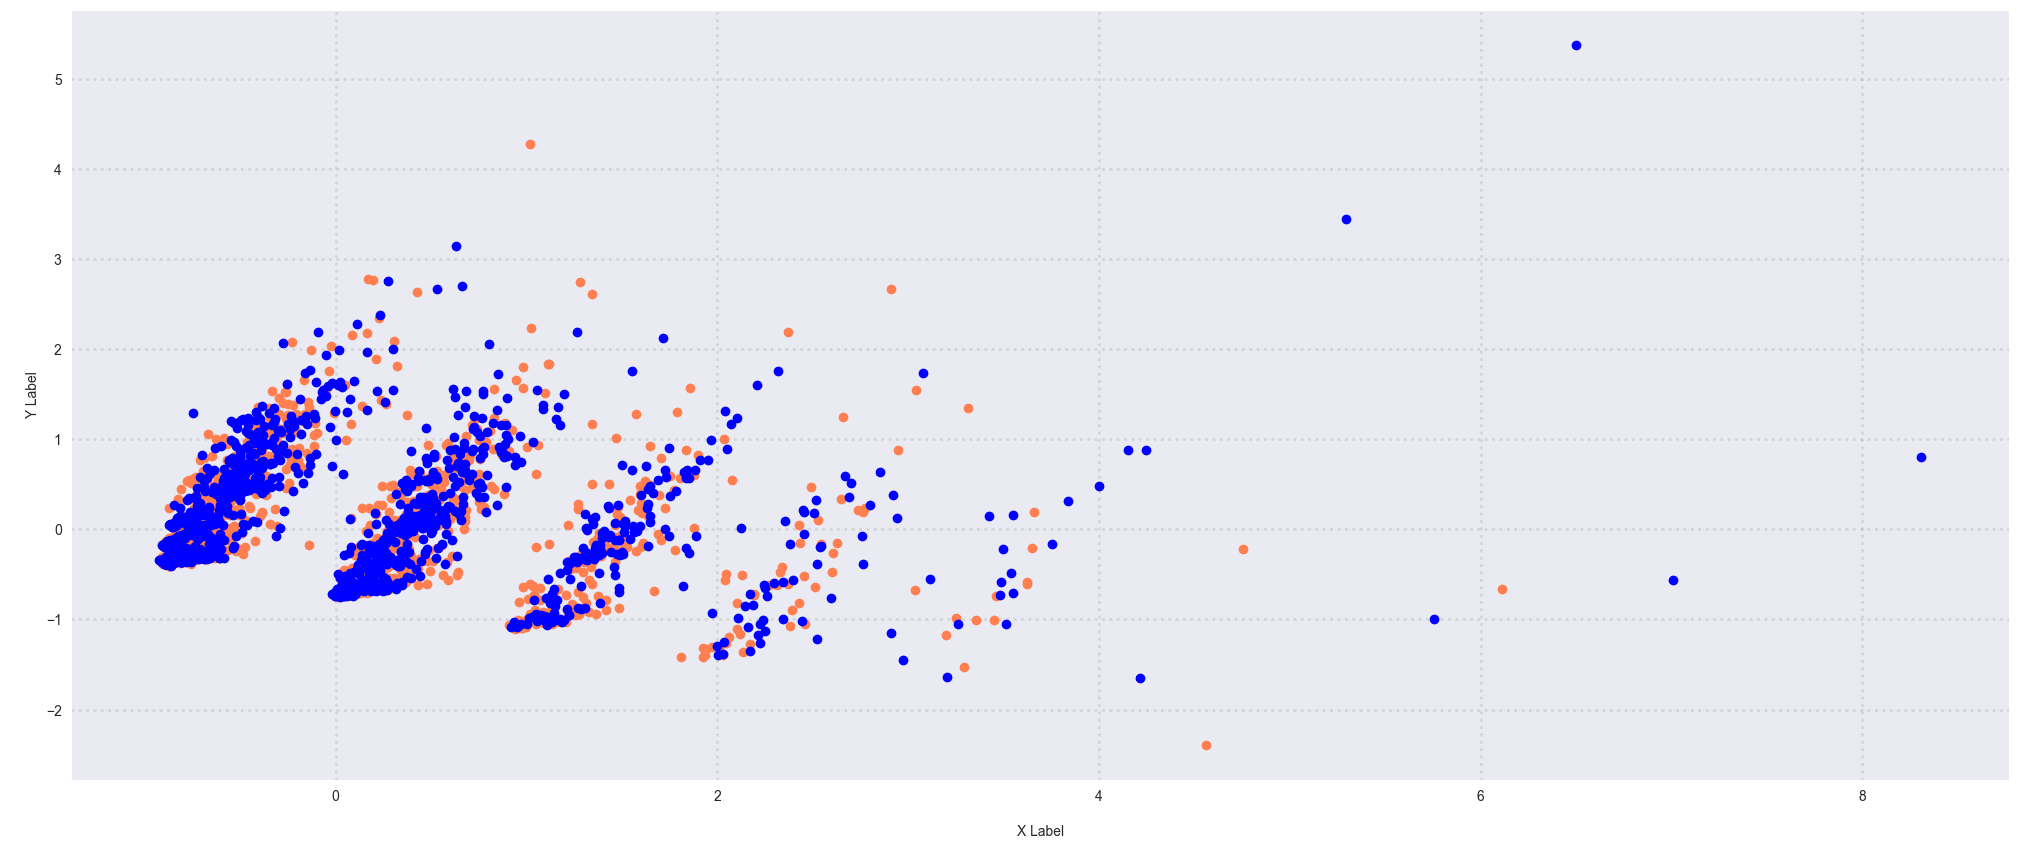

In [70]:
col = ['coral', 'blue']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = X_reduced[X['score'] == category].T[0]
    ys = X_reduced[X['score'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

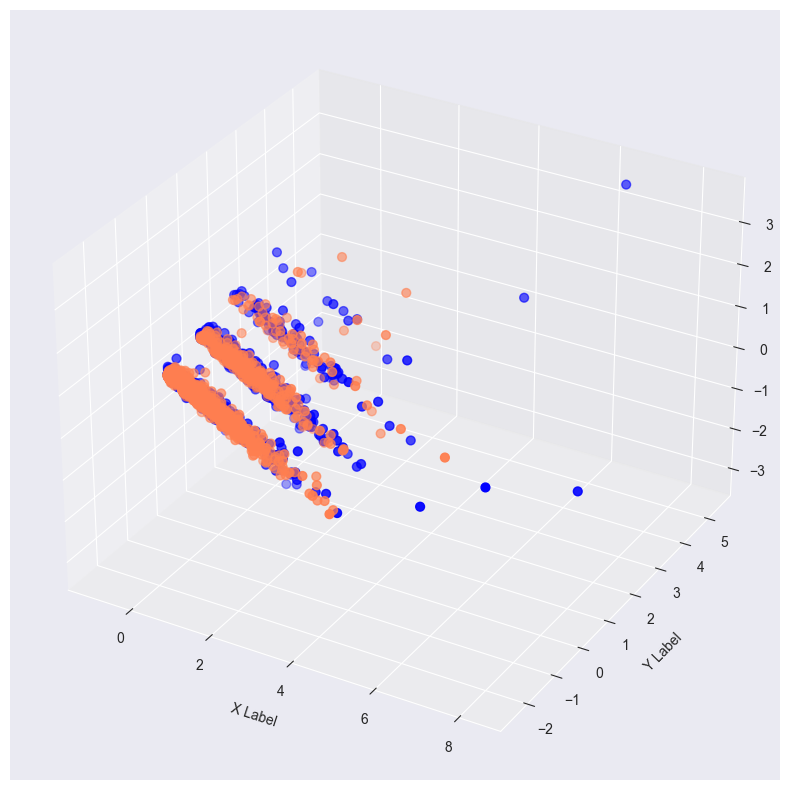

In [71]:
X_reduced_3D = PCA(n_components = 3).fit_transform(X_counts.toarray())
X_reduced_3D

col = ['coral', 'blue']

# plot
fig = plt.figure(1, figsize=(25, 10))    # figsize = (25,10)
ax = fig.add_subplot(projection='3d')
# ax = Axes3D(fig, elev=-150, azim=90)

for c, category in zip(col, categories):
    xs = X_reduced_3D[X['score'] == category].T[0]
    ys = X_reduced_3D[X['score'] == category].T[1]
    zs = X_reduced_3D[X['score'] == category].T[2]
   
    ax.scatter(xs, ys, zs, c = c, s=40)

# ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
ax.view_init()
plt.show()

#### Attribute Transformation / Aggregation

In [72]:
term_frequencies = []
print(X_counts.shape[1])
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:, j].toarray()))

5155


In [73]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

C:\Users\908\AppData\Local\Temp\ipykernel_17928\2124377475.py:4: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



[Text(0, 0, '00'),
 Text(1, 0, '10'),
 Text(2, 0, '100'),
 Text(3, 0, '11'),
 Text(4, 0, '12'),
 Text(5, 0, '13'),
 Text(6, 0, '15'),
 Text(7, 0, '15g'),
 Text(8, 0, '15pm'),
 Text(9, 0, '17'),
 Text(10, 0, '18'),
 Text(11, 0, '18th'),
 Text(12, 0, '1928'),
 Text(13, 0, '1947'),
 Text(14, 0, '1948'),
 Text(15, 0, '1949'),
 Text(16, 0, '1971'),
 Text(17, 0, '1973'),
 Text(18, 0, '1979'),
 Text(19, 0, '1980'),
 Text(20, 0, '1986'),
 Text(21, 0, '1995'),
 Text(22, 0, '1998'),
 Text(23, 0, '20'),
 Text(24, 0, '2000'),
 Text(25, 0, '2005'),
 Text(26, 0, '2006'),
 Text(27, 0, '2007'),
 Text(28, 0, '20th'),
 Text(29, 0, '2160'),
 Text(30, 0, '23'),
 Text(31, 0, '24'),
 Text(32, 0, '25'),
 Text(33, 0, '2mp'),
 Text(34, 0, '30'),
 Text(35, 0, '30s'),
 Text(36, 0, '325'),
 Text(37, 0, '35'),
 Text(38, 0, '350'),
 Text(39, 0, '375'),
 Text(40, 0, '3o'),
 Text(41, 0, '40'),
 Text(42, 0, '40min'),
 Text(43, 0, '42'),
 Text(44, 0, '44'),
 Text(45, 0, '45'),
 Text(46, 0, '4s'),
 Text(47, 0, '4ths'),


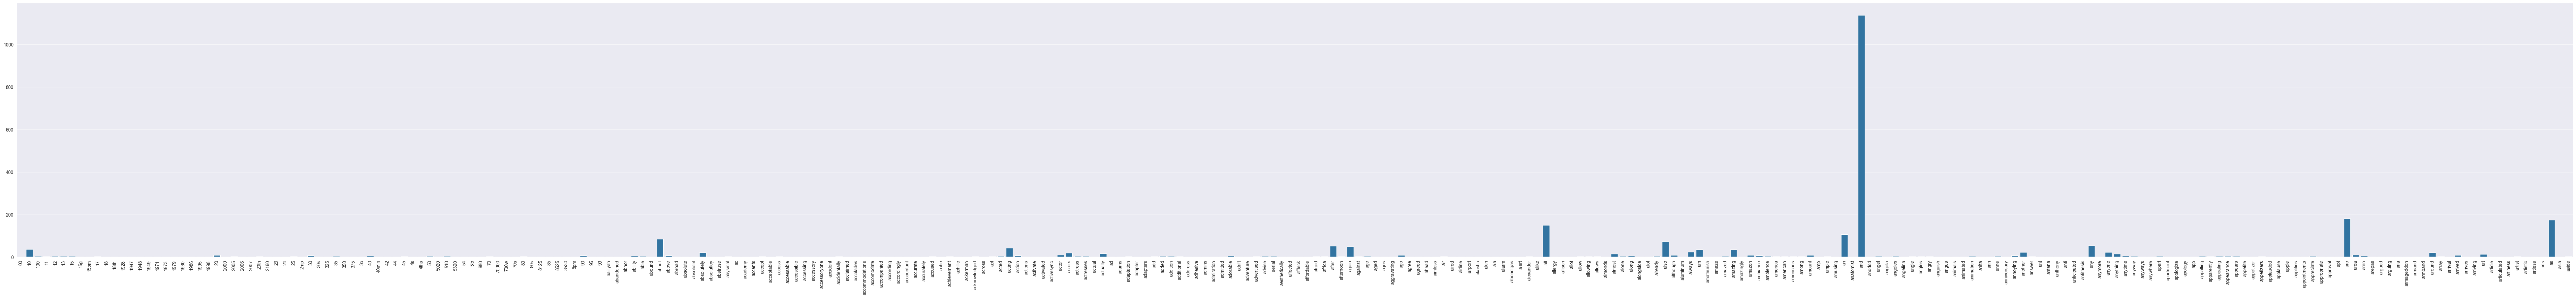

In [74]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)

In [75]:
df = pd.DataFrame()
df['term_frequencies'] = term_frequencies[:300]
df['term'] = count_vect.get_feature_names_out()[:300]
fig = px.bar(df, x='term', y='term_frequencies')
fig.show()

In [76]:
df_14 = df[df['term_frequencies'] > 5]
fig = px.bar(df_14, x='term', y='term_frequencies')
fig.show()

In [77]:
df_15 = df.sort_values(by=['term_frequencies'], ascending=False)
fig = px.bar(df_15, x='term', y='term_frequencies')
fig.show()

In [78]:
term_frequencies_log = [math.log(i) for i in term_frequencies]

C:\Users\908\AppData\Local\Temp\ipykernel_17928\1740177868.py:4: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



[Text(0, 0, '00'),
 Text(1, 0, '10'),
 Text(2, 0, '100'),
 Text(3, 0, '11'),
 Text(4, 0, '12'),
 Text(5, 0, '13'),
 Text(6, 0, '15'),
 Text(7, 0, '15g'),
 Text(8, 0, '15pm'),
 Text(9, 0, '17'),
 Text(10, 0, '18'),
 Text(11, 0, '18th'),
 Text(12, 0, '1928'),
 Text(13, 0, '1947'),
 Text(14, 0, '1948'),
 Text(15, 0, '1949'),
 Text(16, 0, '1971'),
 Text(17, 0, '1973'),
 Text(18, 0, '1979'),
 Text(19, 0, '1980'),
 Text(20, 0, '1986'),
 Text(21, 0, '1995'),
 Text(22, 0, '1998'),
 Text(23, 0, '20'),
 Text(24, 0, '2000'),
 Text(25, 0, '2005'),
 Text(26, 0, '2006'),
 Text(27, 0, '2007'),
 Text(28, 0, '20th'),
 Text(29, 0, '2160'),
 Text(30, 0, '23'),
 Text(31, 0, '24'),
 Text(32, 0, '25'),
 Text(33, 0, '2mp'),
 Text(34, 0, '30'),
 Text(35, 0, '30s'),
 Text(36, 0, '325'),
 Text(37, 0, '35'),
 Text(38, 0, '350'),
 Text(39, 0, '375'),
 Text(40, 0, '3o'),
 Text(41, 0, '40'),
 Text(42, 0, '40min'),
 Text(43, 0, '42'),
 Text(44, 0, '44'),
 Text(45, 0, '45'),
 Text(46, 0, '4s'),
 Text(47, 0, '4ths'),


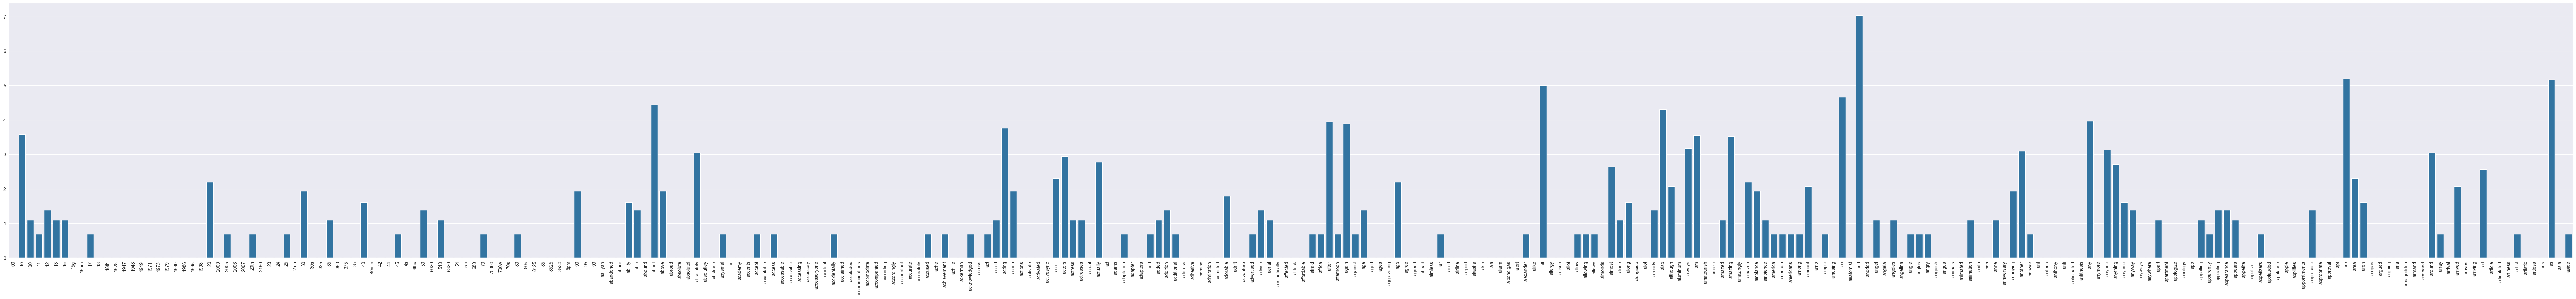

In [79]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)

#### Discretization and Binarization

In [80]:
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.score)

LabelBinarizer()

In [81]:
X['bin_category'] = mlb.transform(X['score']).tolist()
X[0:9]

sentence score  \
0  So there is no way for me to plug it in here i...     0   
1                        Good case, Excellent value.     1   
2                             Great for the jawbone.     1   
3  Tied to charger for conversations lasting more...     0   
4                                  The mic is great.     1   
5  I have to jiggle the plug to get it to line up...     0   
6  If you have several dozen or several hundred c...     0   
7        If you are Razr owner...you must have this!     1   
8                Needless to say, I wasted my money.     0   

                                            unigrams bin_category  
0  [So, there, is, no, way, for, me, to, plug, it...          [0]  
1               [Good, case, ,, Excellent, value, .]          [1]  
2                      [Great, for, the, jawbone, .]          [1]  
3  [Tied, to, charger, for, conversations, lastin...          [0]  
4                           [The, mic, is, great, .]          [1]  
5  [I, have, to, jiggle, the, plug, to, get, it, ...          [0]  
6  [If, you, have, several, dozen, or, several, h...          [0]  
7  [If, you, are, Razr, owner, ..., you, must, ha...          [1]  
8    [Needless, to, say, ,, I, wasted, my, money, .]          [0]

### Data Exploration

In [82]:
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['sentence']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['sentence']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['sentence']
document_to_transform_3.append(random_record_3)

print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

["Not loud enough and doesn't turn on like it should."]
['Integrated seamlessly with the Motorola RAZR phone.']
['I Was Hoping for More.']


In [83]:
# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())
print(document_vector_count_1)

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
  (0, 216)	1
  (0, 1345)	1
  (0, 1540)	1
  (0, 2432)	1
  (0, 2638)	1
  (0, 2703)	1
  (0, 3063)	1
  (0, 3122)	1
  (0, 4054)	1
  (0, 4722)	1


In [84]:
# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


C:\Users\908\AppData\Local\Temp\ipykernel_17928\4228019058.py:11: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\908\AppData\Local\Temp\ipykernel_17928\4228019058.py:12: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\908\AppData\Local\Temp\ipykernel_17928\4228019058.py:13: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\908\AppData\Local\Temp\ipykernel_17928\4228019058.py:15: DeprecationWarning:

Conversion of an array with ndim > 0 to a scal

## Part 3

### New Data Visualizations

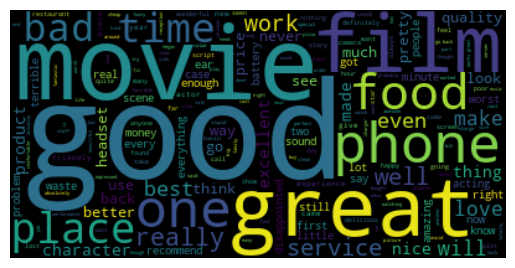

In [85]:
text_string = ' '.join([i[0]for i in content])
wordcloud = WordCloud().generate(text_string)

# word cloud
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()    

### TF-IDF Features Generation

In [86]:
vectorizer = TfidfVectorizer()
tf_idf = vectorizer.fit_transform(X['sentence'])
tf_idf_cols = vectorizer.get_feature_names_out()

In [87]:
df_tf_idf = pd.DataFrame(tf_idf.toarray(), columns=tf_idf_cols)

### Naive Bayes Classifier (TF-IDF features) 

In [88]:
df_tf_idf['label'] = X['score']
df_tf_idf

df_tf_idf.isnull().apply(lambda x: dmh.check_missing_values(x))
df_tf_idf[df_tf_idf['label'].isnull()==True]

00   10  100   11   12   13   15  15g  15pm   17  ...  yukon  yum  \
285   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0  0.0   
407   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0  0.0   
524   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0  0.0   
543   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0  0.0   
744   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0  0.0   
748   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0  0.0   
778   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0  0.0   
792   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0  0.0   
892   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0  0.0   
896   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0  0.0   
1105  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0  0.0   
1363  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0  0.0   
1585  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0  0.0   
1788  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0  0.0   
2814  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0  0.0   
2816  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0  0.0   
2843  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0  0.0   
2846  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0  0.0   

      yummy  yun  z500a  zero  zillion  zombie  zombiez  label  
285     0.0  0.0    0.0   0.0      0.0     0.0      0.0    NaN  
407     0.0  0.0    0.0   0.0      0.0     0.0      0.0    NaN  
524     0.0  0.0    0.0   0.0      0.0     0.0      0.0    NaN  
543     0.0  0.0    0.0   0.0      0.0     0.0      0.0    NaN  
744     0.0  0.0    0.0   0.0      0.0     0.0      0.0    NaN  
748     0.0  0.0    0.0   0.0      0.0     0.0      0.0    NaN  
778     0.0  0.0    0.0   0.0      0.0     0.0      0.0    NaN  
792     0.0  0.0    0.0   0.0      0.0     0.0      0.0    NaN  
892     0.0  0.0    0.0   0.0      0.0     0.0      0.0    NaN  
896     0.0  0.0    0.0   0.0      0.0     0.0      0.0    NaN  
1105    0.0  0.0    0.0   0.0      0.0     0.0      0.0    NaN  
1363    0.0  0.0    0.0   0.0      0.0     0.0      0.0    NaN  
1585    0.0  0.0    0.0   0.0      0.0     0.0      0.0    NaN  
1788    0.0  0.0    0.0   0.0      0.0     0.0      0.0    NaN  
2814    0.0  0.0    0.0   0.0      0.0     0.0      0.0    NaN  
2816    0.0  0.0    0.0   0.0      0.0     0.0      0.0    NaN  
2843    0.0  0.0    0.0   0.0      0.0     0.0      0.0    NaN  
2846    0.0  0.0    0.0   0.0      0.0     0.0      0.0    NaN  

[18 rows x 5156 columns]

In [89]:
# drop label nan data
print(df_tf_idf.shape)
df_tf_idf = df_tf_idf.dropna(subset='label')
print(df_tf_idf.shape)

(2982, 5156)
(2964, 5156)


In [90]:
# split dataset to training and testing data
train, test = train_test_split(df_tf_idf, test_size=0.2, random_state=42)

X_train = train.iloc[:, :-1]
y_train = train.iloc[:, -1]
X_test = test.iloc[:, :-1]
y_test = test.iloc[:, -1]

In [91]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_test_predict = gnb.predict(X_test)


# confusion matrix
cm = confusion_matrix(y_test, y_test_predict)
cm

array([[ 99, 218],
       [ 71, 205]], dtype=int64)

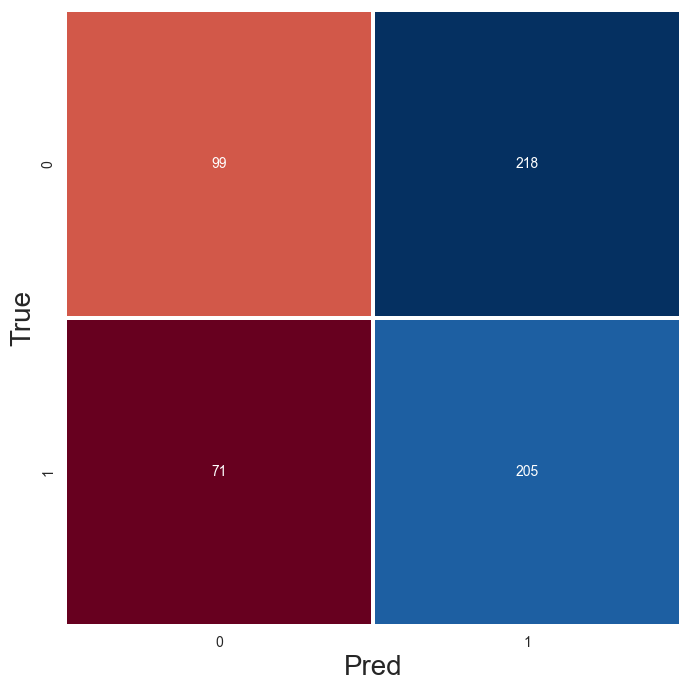

--------------------
accuracy = 0.5126475548060708


In [92]:
# visualize confusion matrix
plt.figure(figsize=(15,8))
sns.heatmap(cm, square=True, annot=True, fmt='d', linecolor='white', cmap='RdBu', linewidths=1.5, cbar=False)
plt.xlabel('Pred', fontsize=20)
plt.ylabel('True', fontsize=20)
plt.show()

print('-'*20)
print(f'accuracy = {(cm[0][0] + cm[1][1])/(cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1])}')

In [93]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.58      0.31      0.41       317
           1       0.48      0.74      0.59       276

    accuracy                           0.51       593
   macro avg       0.53      0.53      0.50       593
weighted avg       0.54      0.51      0.49       593


### Naive Bayes Classifier (Word Frequency)

In [94]:
df_word_freq = pd.DataFrame(X_counts.toarray(), columns=count_vect.get_feature_names_out())

In [95]:
df_word_freq['label'] = X['score']
df_word_freq

df_word_freq.isnull().apply(lambda x: dmh.check_missing_values(x))
df_word_freq[df_word_freq['label'].isnull()==True]

00  10  100  11  12  13  15  15g  15pm  17  ...  yukon  yum  yummy  yun  \
285    0   0    0   0   0   0   0    0     0   0  ...      0    0      0    0   
407    0   0    0   0   0   0   0    0     0   0  ...      0    0      0    0   
524    0   0    0   0   0   0   0    0     0   0  ...      0    0      0    0   
543    0   0    0   0   0   0   0    0     0   0  ...      0    0      0    0   
744    0   0    0   0   0   0   0    0     0   0  ...      0    0      0    0   
748    0   0    0   0   0   0   0    0     0   0  ...      0    0      0    0   
778    0   0    0   0   0   0   0    0     0   0  ...      0    0      0    0   
792    0   0    0   0   0   0   0    0     0   0  ...      0    0      0    0   
892    0   0    0   0   0   0   0    0     0   0  ...      0    0      0    0   
896    0   0    0   0   0   0   0    0     0   0  ...      0    0      0    0   
1105   0   0    0   0   0   0   0    0     0   0  ...      0    0      0    0   
1363   0   0    0   0   0   0   0    0     0   0  ...      0    0      0    0   
1585   0   0    0   0   0   0   0    0     0   0  ...      0    0      0    0   
1788   0   0    0   0   0   0   0    0     0   0  ...      0    0      0    0   
2814   0   0    0   0   0   0   0    0     0   0  ...      0    0      0    0   
2816   0   0    0   0   0   0   0    0     0   0  ...      0    0      0    0   
2843   0   0    0   0   0   0   0    0     0   0  ...      0    0      0    0   
2846   0   0    0   0   0   0   0    0     0   0  ...      0    0      0    0   

      z500a  zero  zillion  zombie  zombiez  label  
285       0     0        0       0        0    NaN  
407       0     0        0       0        0    NaN  
524       0     0        0       0        0    NaN  
543       0     0        0       0        0    NaN  
744       0     0        0       0        0    NaN  
748       0     0        0       0        0    NaN  
778       0     0        0       0        0    NaN  
792       0     0        0       0        0    NaN  
892       0     0        0       0        0    NaN  
896       0     0        0       0        0    NaN  
1105      0     0        0       0        0    NaN  
1363      0     0        0       0        0    NaN  
1585      0     0        0       0        0    NaN  
1788      0     0        0       0        0    NaN  
2814      0     0        0       0        0    NaN  
2816      0     0        0       0        0    NaN  
2843      0     0        0       0        0    NaN  
2846      0     0        0       0        0    NaN  

[18 rows x 5156 columns]

In [96]:
# drop data (label == nan)
print(df_word_freq.shape)
df_word_freq = df_word_freq.dropna(subset='label')
print(df_word_freq.shape)

(2982, 5156)
(2964, 5156)


In [97]:
# split dataset to training and testing data
train, test = train_test_split(df_word_freq, test_size=0.2, random_state=42)

X_train = train.iloc[:, :-1]
y_train = train.iloc[:, -1]
X_test = test.iloc[:, :-1]
y_test = test.iloc[:, -1]

In [98]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_test_predict = gnb.predict(X_test)


# confusion matrix
cm = confusion_matrix(y_test, y_test_predict)
cm

array([[ 84, 233],
       [ 58, 218]], dtype=int64)

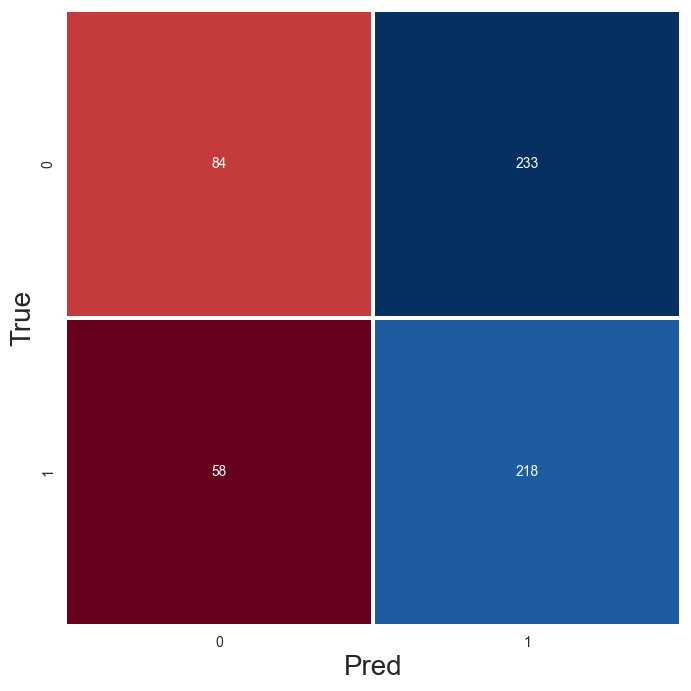

--------------------
accuracy = 0.5092748735244519


In [99]:
# visualize confusion matrix
plt.figure(figsize=(15,8))
sns.heatmap(cm, square=True, annot=True, fmt='d', linecolor='white', cmap='RdBu', linewidths=1.5, cbar=False)
plt.xlabel('Pred', fontsize=20)
plt.ylabel('True', fontsize=20)
plt.show()

print('-'*20)
print(f'accuracy = {(cm[0][0] + cm[1][1])/(cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1])}')

In [100]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.59      0.26      0.37       317
           1       0.48      0.79      0.60       276

    accuracy                           0.51       593
   macro avg       0.54      0.53      0.48       593
weighted avg       0.54      0.51      0.47       593


### Differences between Implementing Naive Bayes Classifier Using TF-IDF and Word Frequency

- The accuracy of implementing naive bayes classifier using tf-idf features is slightly higher than using word frequency.

## Part 4

- While visualizing term frequency using bar chart, I noticed that there are too many meaningless terms in the graph to actually find the meaningful ones in the document. It may be improved by removing stop words before visualization.
- Binarization might not be necessary when there are only 2 categories in 1 feature.